<a href="https://colab.research.google.com/github/gomunamu/pdp/blob/main/bostonhousing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

In [24]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [25]:
from tensorflow import keras
from keras import layers
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mae", metrics=["mae"])
  return model

In [26]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print(f"Processing fold#{i}")
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
  partial_train_data = np.concatenate(
   [train_data[:i * num_val_samples],
    train_data[(i+1) * num_val_samples:]],axis=0
  )
  partial_train_targets = np.concatenate(
   [train_targets[:i * num_val_samples],
    train_targets[(i+1) * num_val_samples:]],axis=0
  )
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=16, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)


Processing fold#0
Processing fold#1
Processing fold#2
Processing fold#3


In [27]:
print(all_scores)
print(np.mean(all_scores))

[2.010117292404175, 2.4401943683624268, 2.461052656173706, 2.5555129051208496]
2.3667193055152893


In [28]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print(f"Processing fold#{i}")
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
  partial_train_data = np.concatenate(
   [train_data[:i * num_val_samples],
    train_data[(i+1) * num_val_samples:]],axis=0
  )
  partial_train_targets = np.concatenate(
   [train_targets[:i * num_val_samples],
    train_targets[(i+1) * num_val_samples:]],axis=0
  )
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data=(val_data, val_targets),
                      epochs=num_epochs, batch_size=16, verbose=0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)

Processing fold#0
Processing fold#1
Processing fold#2
Processing fold#3


In [29]:

avg_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

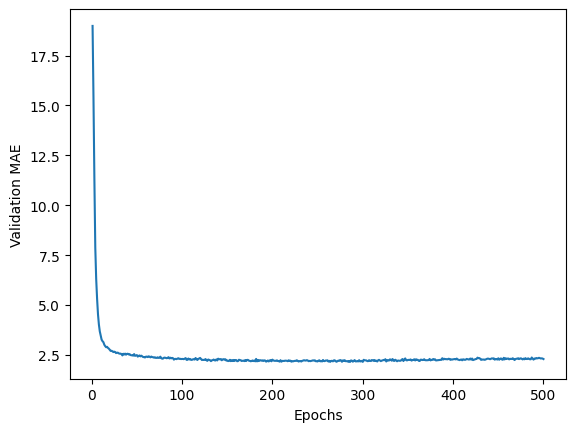

In [30]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(avg_mae_history)+1), avg_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

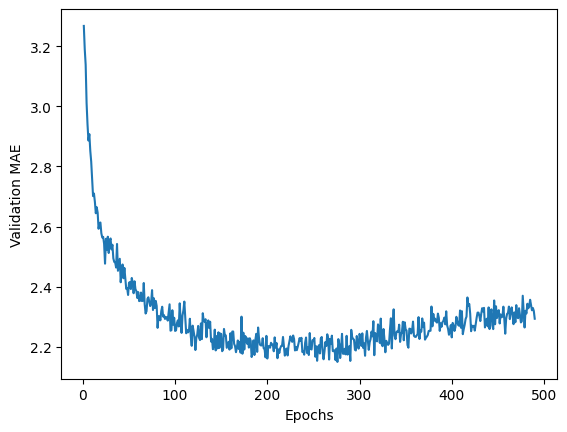

In [31]:
truncated_mae_history = avg_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history)+1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()